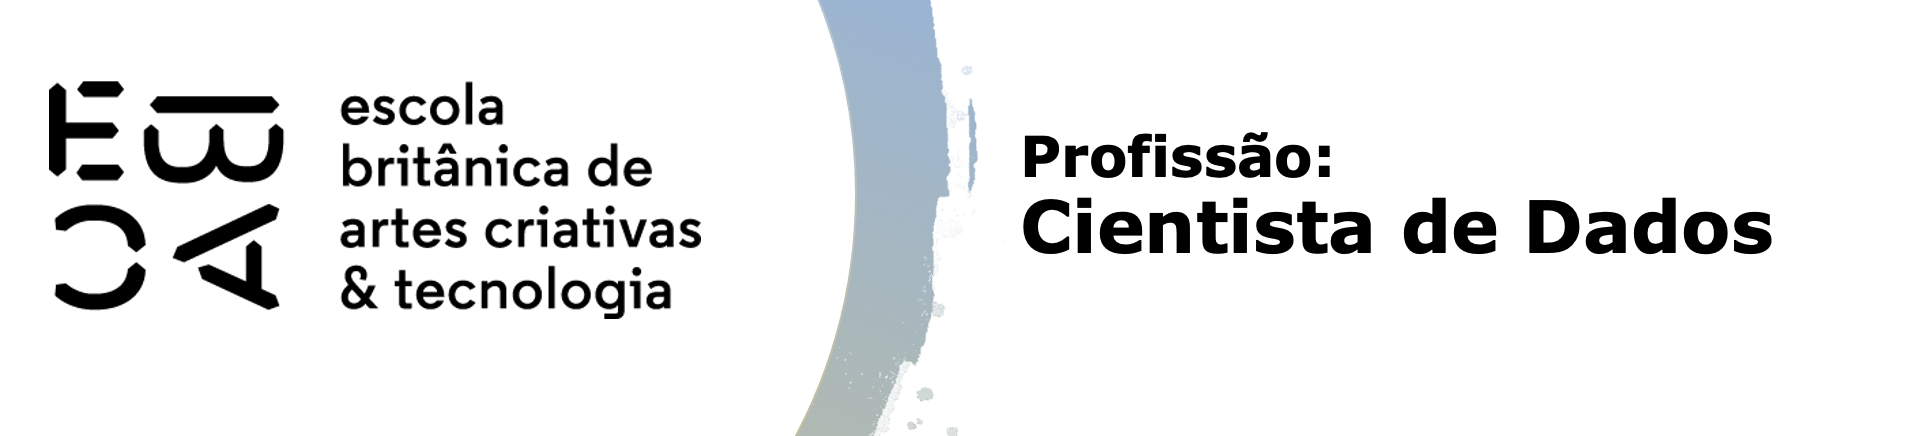

# Árvores II - Tarefa 3

### 1. Carregar as bases

Vamos utilizar nesta tarefa as bases de reconhecimento de atividade humana através do celular. Carregue novamente as bases salvas na tarefa I.

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

In [5]:
X_train = pd.read_csv('X_train.csv').drop(columns='Unnamed: 0')
X_test  = pd.read_csv('X_test.csv').drop(columns='Unnamed: 0')

y_train = pd.read_csv('y_train.csv').drop(columns='Unnamed: 0')
y_test  = pd.read_csv('y_test.csv').drop(columns='Unnamed: 0')

In [6]:
X_train.set_index([X_train.index, 'subject'], inplace=True)
X_test.set_index([X_test.index, 'subject'], inplace=True)
y_train.set_index([y_train.index, 'subject'], inplace=True)
y_test.set_index([y_test.index, 'subject'], inplace=True)

### 2. Calcule os ```ccp_alphas```. 

Vamos seguir uma lógica bem em linha com o que já estamso acostumados, com as seguintes orientações:

- Utilizar treinamento e teste conforme já vieram definidos originalmente
- Por pragmatismo, utilizar ```min_samples_leaf=20```
- Utilize as mesmas "3 melhores variáveis" identificadas no exercício anterior.

In [8]:
%%time
clf = DecisionTreeClassifier(random_state=2360873, min_samples_leaf=20)

CPU times: total: 0 ns
Wall time: 0 ns


In [9]:
%%time
X_train_melhores = X_train[['angle(Y,gravityMean)', 'fBodyAcc-mean()-X', 'tGravityAcc-energy()-X']]
X_test_melhores = X_test[['angle(Y,gravityMean)', 'fBodyAcc-mean()-X', 'tGravityAcc-energy()-X']]

CPU times: total: 0 ns
Wall time: 0 ns


In [10]:
%%time
caminho = clf.cost_complexity_pruning_path(X_train_melhores, y_train)
ccp_alphas, impurities = caminho.ccp_alphas, caminho.impurities

ccp_alphas = np.unique(ccp_alphas[ccp_alphas>=0])
ccp_alphas

CPU times: total: 93.8 ms
Wall time: 23.6 ms


array([0.00000000e+00, 5.44995104e-06, 6.59151729e-06, 7.01879270e-06,
       1.00688213e-05, 1.13157341e-05, 1.16014850e-05, 1.20819934e-05,
       1.71709922e-05, 2.04026115e-05, 2.18260495e-05, 2.24204522e-05,
       3.49759055e-05, 3.50019444e-05, 3.81726280e-05, 3.84049158e-05,
       3.90792056e-05, 4.14529250e-05, 4.76060936e-05, 4.85876625e-05,
       6.11350980e-05, 6.41224934e-05, 6.43815742e-05, 7.76436703e-05,
       8.49884806e-05, 9.12180251e-05, 9.59158433e-05, 9.65080080e-05,
       9.69088102e-05, 9.86692744e-05, 9.95342357e-05, 1.01346036e-04,
       1.01996980e-04, 1.08813928e-04, 1.23714934e-04, 1.25847466e-04,
       1.50361815e-04, 1.54976359e-04, 1.75326218e-04, 1.84844173e-04,
       1.91557853e-04, 2.06206067e-04, 2.16923939e-04, 2.19877768e-04,
       2.21614574e-04, 2.23514503e-04, 2.32384455e-04, 2.32854113e-04,
       2.34521016e-04, 2.34706577e-04, 2.38283524e-04, 2.41444531e-04,
       2.73146473e-04, 2.73278161e-04, 2.74993939e-04, 3.05982310e-04,
      

In [11]:
%%time
ccp_alphas = ccp_alphas[::10]
ccp_alphas

CPU times: total: 0 ns
Wall time: 0 ns


array([0.00000000e+00, 2.18260495e-05, 6.11350980e-05, 9.95342357e-05,
       1.91557853e-04, 2.38283524e-04, 3.70679206e-04, 6.36021804e-04,
       9.47195622e-04, 1.86307104e-03, 2.51626453e-03, 7.14002125e-02])

### 3. *Grid Search*

Vou deixar especificações iniciais mínimas, que visam limitar o tempo de máquina, pois um procedimento desses pode demorar muito tempo dependendo da especificação. Mas conforme você for ficando confortável com o tempo consumido pelo procedimento, pode fazer um algoritmo mais exaustivo, por exemplo, avaliando mais valores de ```ccp_alpha```.

- Meça o tempo
- Utilize a base de treinamento
- Utilize um *cross validation* do tipo *k-fold*, especifique k=10
- Você pode ler 1 a cada ```k``` valores para uma melhor varredura utilizando, por exemplo, ```ccp_alpha[::10]```
- Não se esqueça de limitar o número de variáveis

In [13]:
%%time
grid_parametros = {'ccp_alpha':ccp_alphas}
grid_parametros

CPU times: total: 0 ns
Wall time: 0 ns


{'ccp_alpha': array([0.00000000e+00, 2.18260495e-05, 6.11350980e-05, 9.95342357e-05,
        1.91557853e-04, 2.38283524e-04, 3.70679206e-04, 6.36021804e-04,
        9.47195622e-04, 1.86307104e-03, 2.51626453e-03, 7.14002125e-02])}

In [14]:
%%time
grid = GridSearchCV(estimator = clf, param_grid=grid_parametros,cv=10, verbose=100)
grid.fit(X_train_melhores, y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV 1/10; 1/12] START ccp_alpha=0.0.............................................
[CV 1/10; 1/12] END ..............ccp_alpha=0.0;, score=0.730 total time=   0.0s
[CV 2/10; 1/12] START ccp_alpha=0.0.............................................
[CV 2/10; 1/12] END ..............ccp_alpha=0.0;, score=0.751 total time=   0.0s
[CV 3/10; 1/12] START ccp_alpha=0.0.............................................
[CV 3/10; 1/12] END ..............ccp_alpha=0.0;, score=0.815 total time=   0.0s
[CV 4/10; 1/12] START ccp_alpha=0.0.............................................
[CV 4/10; 1/12] END ..............ccp_alpha=0.0;, score=0.702 total time=   0.0s
[CV 5/10; 1/12] START ccp_alpha=0.0.............................................
[CV 5/10; 1/12] END ..............ccp_alpha=0.0;, score=0.785 total time=   0.0s
[CV 6/10; 1/12] START ccp_alpha=0.0.............................................
[CV 6/10; 1/12] END ..............ccp_alpha=0.

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(min_samples_leaf=20,
                                              random_state=2360873),
             param_grid={'ccp_alpha': array([0.00000000e+00, 2.18260495e-05, 6.11350980e-05, 9.95342357e-05,
       1.91557853e-04, 2.38283524e-04, 3.70679206e-04, 6.36021804e-04,
       9.47195622e-04, 1.86307104e-03, 2.51626453e-03, 7.14002125e-02])},
             verbose=100)

In [15]:
%%time
grid

CPU times: total: 0 ns
Wall time: 0 ns


GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(min_samples_leaf=20,
                                              random_state=2360873),
             param_grid={'ccp_alpha': array([0.00000000e+00, 2.18260495e-05, 6.11350980e-05, 9.95342357e-05,
       1.91557853e-04, 2.38283524e-04, 3.70679206e-04, 6.36021804e-04,
       9.47195622e-04, 1.86307104e-03, 2.51626453e-03, 7.14002125e-02])},
             verbose=100)

In [16]:
%%time
resultados = pd.DataFrame(grid.cv_results_)
resultados.head()

CPU times: total: 0 ns
Wall time: 804 µs


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.015564,0.005660,0.002814,0.003895,0.000000,{'ccp_alpha': 0.0},0.72962,0.751359,0.814966,0.702041,0.785034,0.752381,0.797279,0.714286,0.839456,0.771429,0.765785,0.042014,5
1,0.015437,0.004551,0.001382,0.003208,0.000022,{'ccp_alpha': 2.182604954829577e-05},0.72962,0.751359,0.814966,0.702041,0.785034,0.752381,0.797279,0.714286,0.839456,0.771429,0.765785,0.042014,5
2,0.015071,0.002979,0.000601,0.000918,0.000061,{'ccp_alpha': 6.113509801981983e-05},0.72962,0.751359,0.814966,0.702041,0.785034,0.752381,0.797279,0.714286,0.839456,0.771429,0.765785,0.042014,5
3,0.015285,0.004502,0.001194,0.000975,0.000100,{'ccp_alpha': 9.953423570927358e-05},0.72962,0.751359,0.816327,0.702041,0.783673,0.752381,0.797279,0.714286,0.839456,0.767347,0.765377,0.042078,8
4,0.015250,0.004497,0.002783,0.003155,0.000192,{'ccp_alpha': 0.00019155785273848418},0.72962,0.751359,0.813605,0.704762,0.783673,0.752381,0.798639,0.714286,0.834014,0.767347,0.764969,0.040508,9


In [17]:
%%time
grid.best_score_

CPU times: total: 0 ns
Wall time: 0 ns


0.7879517894114167

In [18]:
%%time
resultados

CPU times: total: 0 ns
Wall time: 0 ns


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.015564,0.005660,0.002814,0.003895,0.000000,{'ccp_alpha': 0.0},0.729620,0.751359,0.814966,0.702041,0.785034,0.752381,0.797279,0.714286,0.839456,0.771429,0.765785,0.042014,5
1,0.015437,0.004551,0.001382,0.003208,0.000022,{'ccp_alpha': 2.182604954829577e-05},0.729620,0.751359,0.814966,0.702041,0.785034,0.752381,0.797279,0.714286,0.839456,0.771429,0.765785,0.042014,5
2,0.015071,0.002979,0.000601,0.000918,0.000061,{'ccp_alpha': 6.113509801981983e-05},0.729620,0.751359,0.814966,0.702041,0.785034,0.752381,0.797279,0.714286,0.839456,0.771429,0.765785,0.042014,5
3,0.015285,0.004502,0.001194,0.000975,0.000100,{'ccp_alpha': 9.953423570927358e-05},0.729620,0.751359,0.816327,0.702041,0.783673,0.752381,0.797279,0.714286,0.839456,0.767347,0.765377,0.042078,8
4,0.015250,0.004497,0.002783,0.003155,0.000192,{'ccp_alpha': 0.00019155785273848418},0.729620,0.751359,0.813605,0.704762,0.783673,0.752381,0.798639,0.714286,0.834014,0.767347,0.764969,0.040508,9
5,0.016668,0.004385,0.001562,0.001118,0.000238,{'ccp_alpha': 0.00023828352354682844},0.729620,0.751359,0.812245,0.704762,0.757823,0.752381,0.809524,0.711565,0.834014,0.767347,0.763064,0.041325,10
6,0.015901,0.006854,0.001016,0.001016,0.000371,{'ccp_alpha': 0.00037067920580973954},0.726902,0.751359,0.812245,0.700680,0.763265,0.755102,0.810884,0.708844,0.843537,0.755102,0.762792,0.044254,11
7,0.016616,0.004037,0.001138,0.000934,0.000636,{'ccp_alpha': 0.0006360218037312708},0.709239,0.754076,0.820408,0.726531,0.804082,0.753741,0.842177,0.712925,0.854422,0.753741,0.773134,0.050559,4
8,0.015768,0.004861,0.001232,0.001028,0.000947,{'ccp_alpha': 0.0009471956215572399},0.800272,0.754076,0.836735,0.734694,0.798639,0.767347,0.855782,0.697959,0.870748,0.763265,0.787952,0.052171,1
9,0.015160,0.006232,0.001149,0.000943,0.001863,{'ccp_alpha': 0.0018630710394935126},0.816576,0.786685,0.816327,0.751020,0.725170,0.791837,0.844898,0.697959,0.862585,0.729252,0.782231,0.051939,3


### 4. Avaliando a árvore

- Obtenha a árvore na melhor configuração treinada em toda a base de treino
- Calcule a acurácia dessa árvore na base de testes
- Visualize a matriz de confusão

In [20]:
%%time
melhor_ccp = resultados.iloc[grid.best_index_,4]

clf = DecisionTreeClassifier(random_state=2360873, ccp_alpha=melhor_ccp).fit(X_train_melhores, y_train)

CPU times: total: 15.6 ms
Wall time: 23.6 ms


In [21]:
%%time
clf.score(X_test_melhores, y_test)

CPU times: total: 0 ns
Wall time: 3 ms


0.6932473702069901

In [22]:
%%time
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=2360873, ccp_alpha=ccp_alpha).fit(X_train_melhores, y_train)
    clfs.append(clf)

CPU times: total: 250 ms
Wall time: 261 ms


In [23]:
%%time
train_scores = [clf.score(X_train_melhores, y_train) for clf in clfs]
test_scores  = [clf.score(X_test_melhores, y_test)   for clf in clfs]

CPU times: total: 78.1 ms
Wall time: 53.6 ms


In [24]:
%%time
ind_melhor_arvore = len(test_scores) - test_scores[::-1].index(max(test_scores)) - 1
melhor_arvore = clfs[ind_melhor_arvore]

print(f'Acurácia da melhor árvore na base de validação: {test_scores[ind_melhor_arvore]*100:.2f}')

melhor_arvore

Acurácia da melhor árvore na base de validação: 71.90
CPU times: total: 0 ns
Wall time: 0 ns


DecisionTreeClassifier(ccp_alpha=0.0018630710394935126, random_state=2360873)

Acurácia: 71.90
CPU times: total: 62.5 ms
Wall time: 81.6 ms


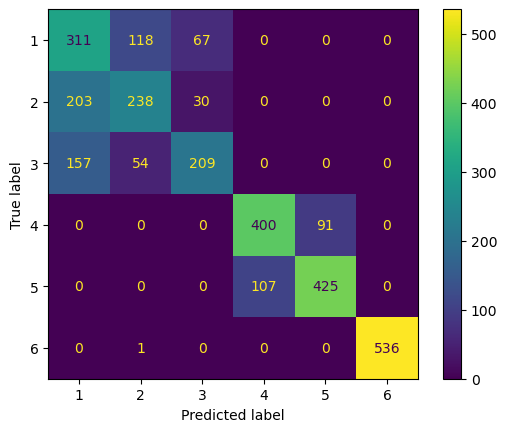

In [25]:
%%time
acuracia_teste = melhor_arvore.score(X_test_melhores, y_test)

print(f'Acurácia: {acuracia_teste*100:.2f}')
ConfusionMatrixDisplay.from_estimator(melhor_arvore, X_test_melhores, y_test);

### 5. Melhorando a árvore

A melhor forma de se melhorar um algoritmo é colocando nele novas variáveis que agreguem valor. Podemos usar a força-bruta e ir colocando variáveis aleatoriamente - ou colocar todas e deixar rodando por um bom tempo - ou utilizar uma lógica eficiente e fazer uma seleção de variáveis.

- Observe que há classes mais fáceis e mais difíceis de se identificar
- Crie uma variável binária para uma das classes de maior erro
- Fala uma árvore de classificação bem simples para esta variável:
    - utilize ```mean_samples_leaf=20```
    - utilize ```max_depth=4```
    - coloque todas as variáveis
- Observe a importância das variáveis, e selecione as 3 com maior importância
- Rode novamente o algoritmo acima com as 3 novas variáveis e avalie a acurácia

1. Criando uma variável binária para uma das classes de maior erro

In [28]:
X_test_error = X_test.copy()
X_train_error = X_train.copy()
X_test_error['error_class'] = (y_test.iloc[:, 0] == 1).astype(int).tolist()
X_train_error['error_class'] = (y_train.iloc[:, 0] == 1).astype(int).tolist()

2.Fazendo uma árvore de classificação bem simples para esta variável:

In [30]:
clf = DecisionTreeClassifier(random_state=2360873,min_samples_leaf=20, max_depth=4).fit(X_train_error, y_train)

3. Observando a importância das variáveis, e selecionando as 3 com maior importância

In [35]:
importancia = clf.feature_importances_
var = X_train_error.columns[:len(importancia)]

importancia_df = pd.DataFrame({'var': var, 'importancia': importancia})
importancia_df.sort_values(by='importancia', ascending=False).head(3)

,var,importancia
52,tGravityAcc-min()-X,0.261584
271,fBodyAcc-mad()-X,0.235051
561,error_class,0.220461


4. Rodando novamente o algoritmo acima com as 3 novas variáveis e avaliando a acurácia

In [38]:
melhores_variaveis = importancia_df.sort_values(by='importancia', ascending=False).iloc[0:3, 0].to_list()

In [40]:
X_train_melhores = X_train_error[melhores_variaveis]
X_test_melhores = X_test_error[melhores_variaveis]

In [48]:
%%time
caminho = clf.cost_complexity_pruning_path(X_train_melhores, y_train)
ccp_alphas, impurities = caminho.ccp_alphas, caminho.impurities

ccp_alphas = np.unique(ccp_alphas[ccp_alphas>=0])
ccp_alphas



CPU times: total: 15.6 ms
Wall time: 17.7 ms


array([0.        , 0.001898  , 0.00219678, 0.02246683, 0.06303639,
       0.15687567, 0.16725772, 0.18613824])

In [50]:
%%time
grid_parametros = {'ccp_alpha':ccp_alphas}
grid_parametros

CPU times: total: 0 ns
Wall time: 1e+03 µs


{'ccp_alpha': array([0.        , 0.001898  , 0.00219678, 0.02246683, 0.06303639,
        0.15687567, 0.16725772, 0.18613824])}

In [52]:
%%time
grid = GridSearchCV(estimator = clf, param_grid=grid_parametros,cv=10, verbose=100)
grid.fit(X_train_melhores, y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits
[CV 1/10; 1/8] START ccp_alpha=0.0..............................................
[CV 1/10; 1/8] END ...............ccp_alpha=0.0;, score=0.791 total time=   0.0s
[CV 2/10; 1/8] START ccp_alpha=0.0..............................................
[CV 2/10; 1/8] END ...............ccp_alpha=0.0;, score=0.749 total time=   0.0s
[CV 3/10; 1/8] START ccp_alpha=0.0..............................................
[CV 3/10; 1/8] END ...............ccp_alpha=0.0;, score=0.831 total time=   0.0s
[CV 4/10; 1/8] START ccp_alpha=0.0..............................................
[CV 4/10; 1/8] END ...............ccp_alpha=0.0;, score=0.807 total time=   0.0s
[CV 5/10; 1/8] START ccp_alpha=0.0..............................................
[CV 5/10; 1/8] END ...............ccp_alpha=0.0;, score=0.731 total time=   0.0s
[CV 6/10; 1/8] START ccp_alpha=0.0..............................................
[CV 6/10; 1/8] END ...............ccp_alpha=0.0;

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(max_depth=4, min_samples_leaf=20,
                                              random_state=2360873),
             param_grid={'ccp_alpha': array([0.        , 0.001898  , 0.00219678, 0.02246683, 0.06303639,
       0.15687567, 0.16725772, 0.18613824])},
             verbose=100)

In [54]:
%%time
grid

CPU times: total: 0 ns
Wall time: 0 ns


GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(max_depth=4, min_samples_leaf=20,
                                              random_state=2360873),
             param_grid={'ccp_alpha': array([0.        , 0.001898  , 0.00219678, 0.02246683, 0.06303639,
       0.15687567, 0.16725772, 0.18613824])},
             verbose=100)

In [56]:
%%time
resultados = pd.DataFrame(grid.cv_results_)
resultados.head()

CPU times: total: 0 ns
Wall time: 0 ns


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.015170,0.007305,0.002921,0.003154,0.000000,{'ccp_alpha': 0.0},0.790761,0.748641,0.831293,0.806803,0.730612,0.779592,0.809524,0.809524,0.862585,0.674830,0.784416,0.051300,2
1,0.011759,0.003700,0.003306,0.002338,0.001898,{'ccp_alpha': 0.0018979986464792535},0.790761,0.748641,0.831293,0.806803,0.730612,0.779592,0.809524,0.809524,0.851701,0.674830,0.783328,0.049721,3
2,0.013145,0.005943,0.003372,0.004692,0.002197,{'ccp_alpha': 0.002196779295309037},0.790761,0.748641,0.831293,0.808163,0.730612,0.779592,0.809524,0.809524,0.851701,0.789116,0.794893,0.034223,1
3,0.010643,0.006023,0.002904,0.004460,0.022467,{'ccp_alpha': 0.02246683368460259},0.762228,0.748641,0.795918,0.808163,0.765986,0.779592,0.809524,0.755102,0.800000,0.741497,0.776665,0.024094,4
4,0.011416,0.006718,0.003370,0.003198,0.063036,{'ccp_alpha': 0.06303638808372822},0.762228,0.736413,0.692517,0.691156,0.765986,0.689796,0.689796,0.755102,0.689796,0.741497,0.721429,0.031883,5


In [58]:
%%time
grid.best_score_

CPU times: total: 0 ns
Wall time: 0 ns


0.7948925983436853

In [60]:
%%time
resultados

CPU times: total: 0 ns
Wall time: 0 ns


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.015170,0.007305,0.002921,0.003154,0.000000,{'ccp_alpha': 0.0},0.790761,0.748641,0.831293,0.806803,0.730612,0.779592,0.809524,0.809524,0.862585,0.674830,0.784416,0.051300,2
1,0.011759,0.003700,0.003306,0.002338,0.001898,{'ccp_alpha': 0.0018979986464792535},0.790761,0.748641,0.831293,0.806803,0.730612,0.779592,0.809524,0.809524,0.851701,0.674830,0.783328,0.049721,3
2,0.013145,0.005943,0.003372,0.004692,0.002197,{'ccp_alpha': 0.002196779295309037},0.790761,0.748641,0.831293,0.808163,0.730612,0.779592,0.809524,0.809524,0.851701,0.789116,0.794893,0.034223,1
3,0.010643,0.006023,0.002904,0.004460,0.022467,{'ccp_alpha': 0.02246683368460259},0.762228,0.748641,0.795918,0.808163,0.765986,0.779592,0.809524,0.755102,0.800000,0.741497,0.776665,0.024094,4
4,0.011416,0.006718,0.003370,0.003198,0.063036,{'ccp_alpha': 0.06303638808372822},0.762228,0.736413,0.692517,0.691156,0.765986,0.689796,0.689796,0.755102,0.689796,0.741497,0.721429,0.031883,5
5,0.012094,0.006836,0.004071,0.002832,0.156876,{'ccp_alpha': 0.1568756665281737},0.546196,0.546196,0.546939,0.691156,0.689796,0.689796,0.689796,0.542857,0.544218,0.544218,0.603117,0.071061,6
6,0.007950,0.007886,0.001721,0.004041,0.167258,{'ccp_alpha': 0.1672577195777995},0.546196,0.546196,0.379592,0.545578,0.544218,0.544218,0.544218,0.376871,0.376871,0.376871,0.478083,0.082090,7
7,0.011060,0.004944,0.004546,0.004321,0.186138,{'ccp_alpha': 0.1861382417305819},0.191576,0.191576,0.191837,0.191837,0.191837,0.191837,0.191837,0.376871,0.376871,0.376871,0.247295,0.084827,8


In [62]:
%%time
melhor_ccp = resultados.iloc[grid.best_index_,4]

clf = DecisionTreeClassifier(random_state=2360873, ccp_alpha=melhor_ccp).fit(X_train_melhores, y_train)

CPU times: total: 31.2 ms
Wall time: 28.7 ms


In [64]:
%%time
clf.score(X_test_melhores, y_test)

CPU times: total: 0 ns
Wall time: 7.89 ms


0.8031896844248388

In [66]:
%%time
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=2360873, ccp_alpha=ccp_alpha).fit(X_train_melhores, y_train)
    clfs.append(clf)

CPU times: total: 172 ms
Wall time: 196 ms


In [67]:
%%time
train_scores = [clf.score(X_train_melhores, y_train) for clf in clfs]
test_scores  = [clf.score(X_test_melhores, y_test)   for clf in clfs]

CPU times: total: 78.1 ms
Wall time: 77.7 ms


In [70]:
%%time
ind_melhor_arvore = len(test_scores) - test_scores[::-1].index(max(test_scores)) - 1
melhor_arvore = clfs[ind_melhor_arvore]

print(f'Acurácia da melhor árvore na base de validação: {test_scores[ind_melhor_arvore]*100:.2f}')

melhor_arvore

Acurácia da melhor árvore na base de validação: 80.32
CPU times: total: 0 ns
Wall time: 0 ns


DecisionTreeClassifier(ccp_alpha=0.002196779295309037, random_state=2360873)

Acurácia: 80.32
CPU times: total: 78.1 ms
Wall time: 74 ms


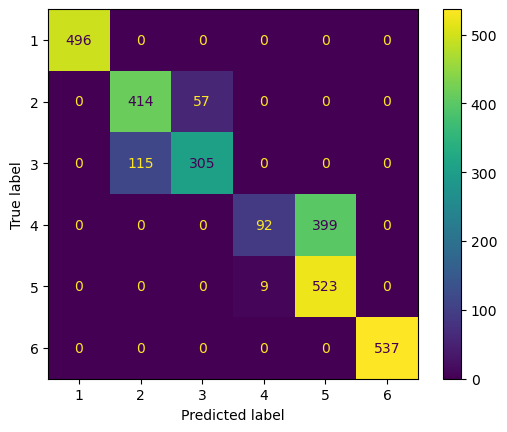

In [72]:
%%time
acuracia_teste = melhor_arvore.score(X_test_melhores, y_test)

print(f'Acurácia: {acuracia_teste*100:.2f}')
ConfusionMatrixDisplay.from_estimator(melhor_arvore, X_test_melhores, y_test);

- Com as mudanças no algoritmo, a Acurácia aumentou de 71.90% para 80.32%